<a href="https://colab.research.google.com/github/IAI-UNSAM/ML_UNSAM/blob/main/02p_playground_Ej_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guía de inferencia bayesiana

## Playground Ej 3





In [ ]:
#imports necesarios

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, uniform, norm, bernoulli, beta


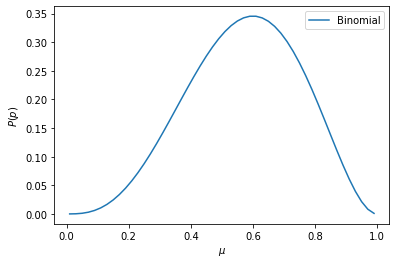

In [ ]:
# Graficamos la binomial
# es discreta, así que graficamos para diferentes mu

#5 intentos, 3 exitos
N=5
X=3
mu = np.linspace(0.01,0.99)

#recordemos PMF = Probabilida de masa
binomial = binom.pmf(X,N,mu)

plt.plot(mu,binomial, label='Binomial')
plt.legend()
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(p)$')
plt.show()

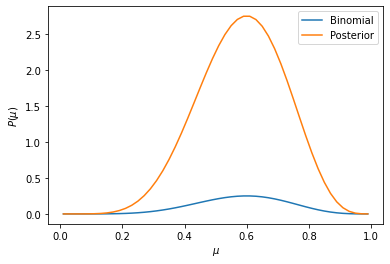

In [ ]:
# Usando la Beta como prior 

N=10
X=6
mu = np.linspace(0.01,0.99)
binomial = binom.pmf(X,N,mu)

posterior = beta.pdf(mu,1+X,1+N-X)
PriorOverEvidence = posterior/binomial

plt.plot(mu,binomial, label='Binomial')
plt.plot(mu,posterior, label = 'Posterior')
plt.legend()
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
plt.show()




Pero nosotros teniamos un prior uniforme, ¿pertenece este prior a la familia de funciones Beta? Si: Es la $Beta(1,1)$

Testeemos esto:


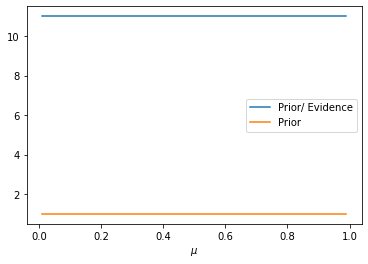

In [ ]:
N=5
X=3
mu = np.linspace(0.01,0.99)
PriorOverEvidence = posterior/binomial

plt.plot(mu,PriorOverEvidence, label='Prior/ Evidence')
plt.plot(mu,uniform.pdf(mu), label='Prior')
plt.legend()
plt.xlabel(r'$\mu$')
plt.show()

Prior Gaussiano
Desafortunadamente, el prior Gaussiano no es el prior conjugado de la binomial, así que no podremos usar el truco de los prior conjugados. Pero podemos seguir haciendo lo primero:$$ Posterior \propto Verosimilitud \times Prior$$Y la evidencia es simplemente para que el posterior este normalizado, es decir que integrado de 1.

Hagamos esto para el set de datos que teniamos:

In [ ]:
#Para jugar, rellenar con lo que corresponda


X = 3
N = 5

mu = np.linspace(0,1,1000)

prior = #.... 
verosimilitud =  #...
posterior = #.....

plt.plot(mu,prior, label='prior')
plt.plot(mu,verosimilitud, label='verosimilitud')
plt.plot(mu,posterior, label='prior')
plt.legend()
plt.xlabel('$\mu$')
plt.show()

Ahora, generemos un set de datos ficticio, correspondiente a una moneda trucada con $\mu=0.8$. Veamos cuantas veces tenemos que tirar la moneda hasta que estemos "convencidos" de que está trucada (es decir, de que $\mu \ne 0.5$ )


In [ ]:
#Primero genero mi experimento. Supongamos un mu verdadero (que luego querré inferir cual es):
true_mu = 0.8
#Genero 1000 tiradas, es un proceso de Bernoulli. Esto es el experimento.
N_max = 10000
tiradas = bernoulli.rvs(true_mu, size=N_max)
#este vector son 1 o 0 (caras o secas). La cantidad de caras las puedo sacar simplemente sumando con .sum().
print(tiradas)

[1 1 0 ... 1 1 1]


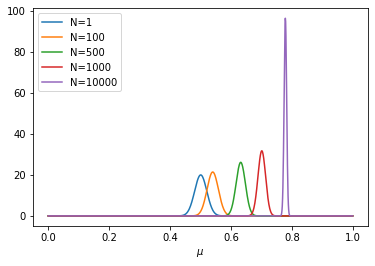

In [ ]:
#Esto es para samplear
mu = np.linspace(0.,1.,num=1000)

#prior normal:
prior = norm.pdf(mu,0.5,0.02)

#Ahora vamos experimentando. Vamos sumando tiradas en 10 pasos.
for N in [1,100,500,1000, N_max]:
    #Numero de eventos que salio cara:
    X = tiradas[:N].sum()
    #verosimilitud binomial
    verosimilitud = binom.pmf(X,N,mu)
    #posterior no normalizado
    posterior = prior*verosimilitud
    #calculo el area bajo la curva (son 1000 puntos equiespaciados)
    evidence = posterior.sum()*0.001
    #normalizo el posterior
    posterior = posterior/evidence
    #ploteo
    plt.plot(mu,posterior, label='N={}'.format(N))
    
#plt.axvline(true_p, label='p real')
plt.legend()
plt.xlabel('$\mu$')
plt.show()